In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from datetime import datetime

In [16]:
pd.set_option('display.max_columns', None)

In [18]:
df = pd.read_csv('urbania_data_clean.csv')

# Verificando la variacion de precios con las variables importantes 

## Distritos

### Reconstruyendo distritos

In [19]:
cols = []
for col in df.columns.tolist():
    if 'Distrito_' in col:
        cols = cols + [col]
cols

['Distrito_Asia',
 'Distrito_Ate',
 'Distrito_Carabayllo',
 'Distrito_CercadoDeLima',
 'Distrito_CerroAzul',
 'Distrito_Chaclacayo',
 'Distrito_Chorrillos',
 'Distrito_Cieneguilla',
 'Distrito_Comas',
 'Distrito_LaMolina',
 'Distrito_LosOlivos',
 'Distrito_Lurin',
 'Distrito_MagdalenaDelMar',
 'Distrito_Mala',
 'Distrito_Miraflores',
 'Distrito_Otros',
 'Distrito_Pachacamac',
 'Distrito_Pucusana',
 'Distrito_PuebloLibre',
 'Distrito_SanBorja',
 'Distrito_SanIsidro',
 'Distrito_SanJuanDeLurigancho',
 'Distrito_SanMartinDePorres',
 'Distrito_SanMiguel',
 'Distrito_SantiagoDeSurco']

In [30]:
(cols[0])[9:]

'Asia'

In [40]:
for col in cols:
    df.loc[df[col]==1, 'Distrito'] = col[9:]

In [41]:
df['Distrito'].values

array(['LaMolina', 'Otros', 'LaMolina', ..., 'LaMolina',
       'SantiagoDeSurco', 'MagdalenaDelMar'], dtype=object)

In [51]:
df_val = df.groupby("Distrito").median()

In [47]:
df_val

,Antiguedad,NroBanios,Nro_pisos,Cocheras,Dormitorios,Mascotas,Precio,latitud,longitud,Area_constr_m2,Area_total_m2,Balneario_IMP,Estado de Inmueble_IMP,Luminosidad_IMP,Uso_comercial_IMP,Uso_profesional_IMP,TipoCochera_IMP,'Cuarto de servicio'_IMP,'Deposito'_IMP,'Terraza'_IMP,'Kitchenette'_IMP,'Sala de estar'_IMP,'Sotano'_IMP,'Patio'_IMP,'anx81tico'_IMP,'Comedor diario'_IMP,'Comedor'_IMP,'Banio de servicio'_IMP,'Jardanxadn Interno'_IMP,'Walking Closet'_IMP,'Escritorio'_IMP,'Cocina'_IMP,'Banio independiente'_IMP,'Lavanderanxada'_IMP,'Balcon'_IMP,'Sala'_IMP,'Closet'_IMP,'Banio de visitas'_IMP,'Agua'_IMP,'Guardiananxada'_IMP,'Internet'_IMP,'Luz'_IMP,'Cable'_IMP,'Servicio de Limpieza'_IMP,'Conexion a gas'_IMP,'Sistema de seguridad'_IMP,'Telefono'_IMP,'Areadeportiva'_IMP,'Piscina'_IMP,'Solarium'_IMP,'Sala de internet'_IMP,'Sala de cine'_IMP,'Jardanxadn'_IMP,'Parque interno'_IMP,'Guarderanxada'_IMP,'anx81reas verdes'_IMP,'Club House'_IMP,'Hall de ingreso'_IMP,'Areade BBQ'_IMP,'Gimnasio'_IMP,'Areade sauna'_IMP,'Juegos para ninios'_IMP,'Ingreso independiente'_IMP,'Colegios cercanos'_IMP,'Cerca al mar'_IMP,'Centros comerciales cercanos'_IMP,'Parques cercanos'_IMP,'Acceso personas discapacidad'_IMP,'Frente al mar'_IMP,'Desagaue'_IMP,'Jacuzzi'_IMP,'Chimenea'_IMP,'Intercomunicador'_IMP,'Cerco Electrico'_IMP,'Parrilla'_IMP,'Aire acondicionado'_IMP,'Amoblado'_IMP,'Sauna'_IMP,'Calefaccion'_IMP,'Equipado'_IMP,'Terma'_IMP,'Portero electrico'_IMP,'Cocina con reposteros'_IMP,ratioConstruccion,ratioBanios,ratioDormitorios,diferenciaAreas,Tipo_Casa,Tipo_Casa de Playa,Tipo_Casa de Playa en condominio,Tipo_Casa de campo,Tipo_Casa en condominio,Tipo_Casa en quinta,Estado de Inmueble_A Remodelar,Estado de Inmueble_Bueno,Estado de Inmueble_Excelente,Estado de Inmueble_Muy bueno,Estado de Inmueble_ND,Estado de Inmueble_Regular,Estado de Inmueble_Remodelado,Luminosidad_Luminoso,Luminosidad_Muy luminoso,Luminosidad_ND,Luminosidad_Poco luminoso,TipoCochera_Lineales,TipoCochera_ND,TipoCochera_NoTiene,TipoCochera_Paralelas,TipoCochera_Separadas,Distrito_Asia,Distrito_Ate,Distrito_Carabayllo,Distrito_CercadoDeLima,Distrito_CerroAzul,Distrito_Chaclacayo,Distrito_Chorrillos,Distrito_Cieneguilla,Distrito_Comas,Distrito_LaMolina,Distrito_LosOlivos,Distrito_Lurin,Distrito_MagdalenaDelMar,Distrito_Mala,Distrito_Miraflores,Distrito_Otros,Distrito_Pachacamac,Distrito_Pucusana,Distrito_PuebloLibre,Distrito_SanBorja,Distrito_SanIsidro,Distrito_SanJuanDeLurigancho,Distrito_SanMartinDePorres,Distrito_SanMiguel,Distrito_SantiagoDeSurco,Provincia_Lima,Provincia_Provincia
Distrito,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Asia,0.232031,0.233684,0.158905,-0.188827,0.141827,0.659864,4.720407e+05,-12.804459,-76.564697,0.098093,-0.388576,0.324830,0.467687,0.748299,0.926871,0.931973,0.464286,0.008503,0.008503,0.008503,0.008503,0.008503,0.008503,0.008503,0.008503,0.008503,0.008503,0.008503,0.008503,0.008503,0.008503,0.008503,0.008503,0.008503,0.008503,0.008503,0.008503,0.008503,0.331633,0.331633,0.331633,0.331633,0.331633,0.331633,0.331633,0.331633,0.331633,0.076531,0.076531,0.076531,0.076531,0.076531,0.076531,0.076531,0.076531,0.076531,0.076531,0.076531,0.076531,0.076531,0.076531,0.076531,0.624150,0.624150,0.624150,0.624150,0.624150,0.624150,0.624150,0.212585,0.212585,0.212585,0.212585,0.212585,0.212585,0.212585,0.212585,0.212585,0.212585,0.212585,0.212585,0.212585,0.212585,1.101209,1.830215,1.895975,31.553878,0.030612,0.724490,0.217687,0.017007,0.010204,0.000000,0.001701,0.098639,0.180272,0.227891,0.467687,0.000000,0.023810,0.015306,0.236395,0.748299,0.000000,0.035714,0.464286,0.113946,0.365646,0.020408,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00000,0.00000
Ate,-0.055319,-0.329965,0.410217,-0.805583,0.157031,1.000000,2.750499e+05,-12.052299,-76.943032,0.213278,-0.486670,1.000000,0.311688,0.415584,0.831169,0.857143,0.428571,0.0

<AxesSubplot:ylabel='Distrito'>

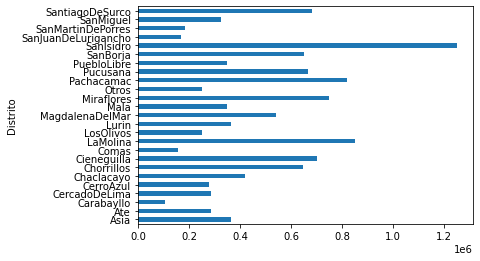

In [52]:
df_val["Precio"].plot.barh()